In [72]:
import pandas as pd
import numpy as np

functions = ["schaffers", "katsuura"]
implementations = ["nr2c", "diag", "bog"]
n_parents = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

fitness_values = {}
fitness_max = {}
fitness_stds = {}
total_fitness = {}

diversity_values = {}
diversity_stds = {}

for func in functions:
    for imp in implementations:
        for n_p in n_parents:
            mean_fitness_values = []
            std_fitness_values = []
            max_fitness_values = []
            max_fitness = []
            dataframe = pd.read_csv("results/parsed/fitness_"+func+"_"+imp+"_"+n_p+".csv")
            if func == "schaffers":
                
                max_fitness.append(dataframe[dataframe.columns[101]])
                for i in range(1, 100):
                    mean_fitness_values.append(dataframe[dataframe.columns[i]].mean())
                    max_fitness_values.append(dataframe[dataframe.columns[i]].max())
                    std_fitness_values.append(dataframe[dataframe.columns[i]].std())
            else:
                max_fitness.append(dataframe[dataframe.columns[91]])
                for i in range(1, 90):
                    mean_fitness_values.append(dataframe[dataframe.columns[i]].mean())
                    max_fitness_values.append(dataframe[dataframe.columns[i]].max())
                    std_fitness_values.append(dataframe[dataframe.columns[i]].std())
            fitness_values[func+"_"+imp+"_"+n_p] = mean_fitness_values
            fitness_max[func+"_"+imp+"_"+n_p] = max_fitness_values
            fitness_stds[func+"_"+imp+"_"+n_p] = std_fitness_values
            total_fitness[func+"_"+imp+"_"+n_p] = max_fitness
            
            mean_diversity_values = []
            std_diversity_values = []
            dataframe = pd.read_csv("results/parsed/diversity_"+func+"_"+imp+"_"+n_p+".csv")
            if func == "schaffers":
                for i in range(1, 100):
                    mean_diversity_values.append(dataframe[dataframe.columns[i]].mean())
                    std_diversity_values.append(dataframe[dataframe.columns[i]].std())
            else:
                for i in range(1, 90):
                    mean_diversity_values.append(dataframe[dataframe.columns[i]].mean())
                    std_diversity_values.append(dataframe[dataframe.columns[i]].std())
            diversity_values[func+"_"+imp+"_"+n_p] = mean_diversity_values
            diversity_stds[func+"_"+imp+"_"+n_p] = std_diversity_values

In [131]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def make_plots(func, imp, ylim):
    if func == "schaffers":
        x = range(0,99)
    else:
        x = range(0,89)
    f, axarr = plt.subplots(1,3, figsize=(20, 5))
    f.suptitle(imp+" on "+func)
    for i in range(1,10):
        axarr[0].plot(x, fitness_values[func+"_"+imp+"_"+str(i)], label="n="+str(i))
        axarr[1].plot(x, fitness_max[func+"_"+imp+"_"+str(i)], label="n="+str(i))
        axarr[2].plot(x, diversity_values[func+"_"+imp+"_"+str(i)], label="n="+str(i))
    axarr[0].set_title('Mean Fitness (measured every 1%)')
    axarr[0].legend()
    axarr[0].set_ylim(ylim[0], ylim[1])
    axarr[1].set_title('Max Fitness (measured every 1%)')
    axarr[1].legend()
    axarr[1].set_ylim(ylim[0], ylim[1])
    axarr[2].set_title('Mean Diversity (measured for the first 10%)')
    axarr[2].legend()
    

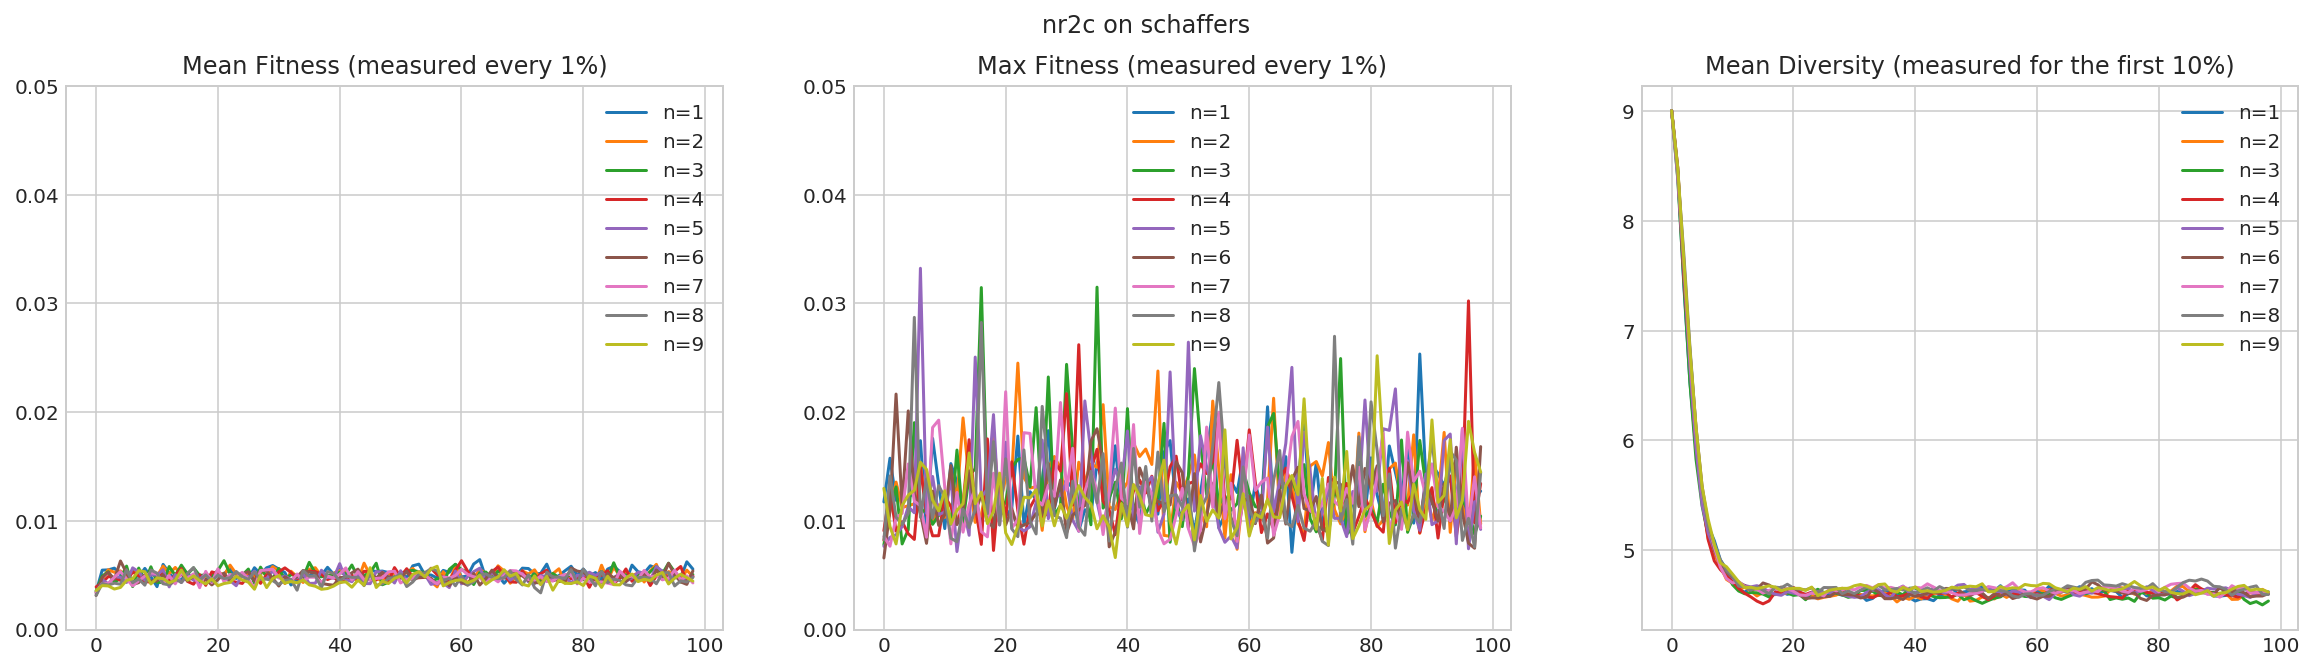

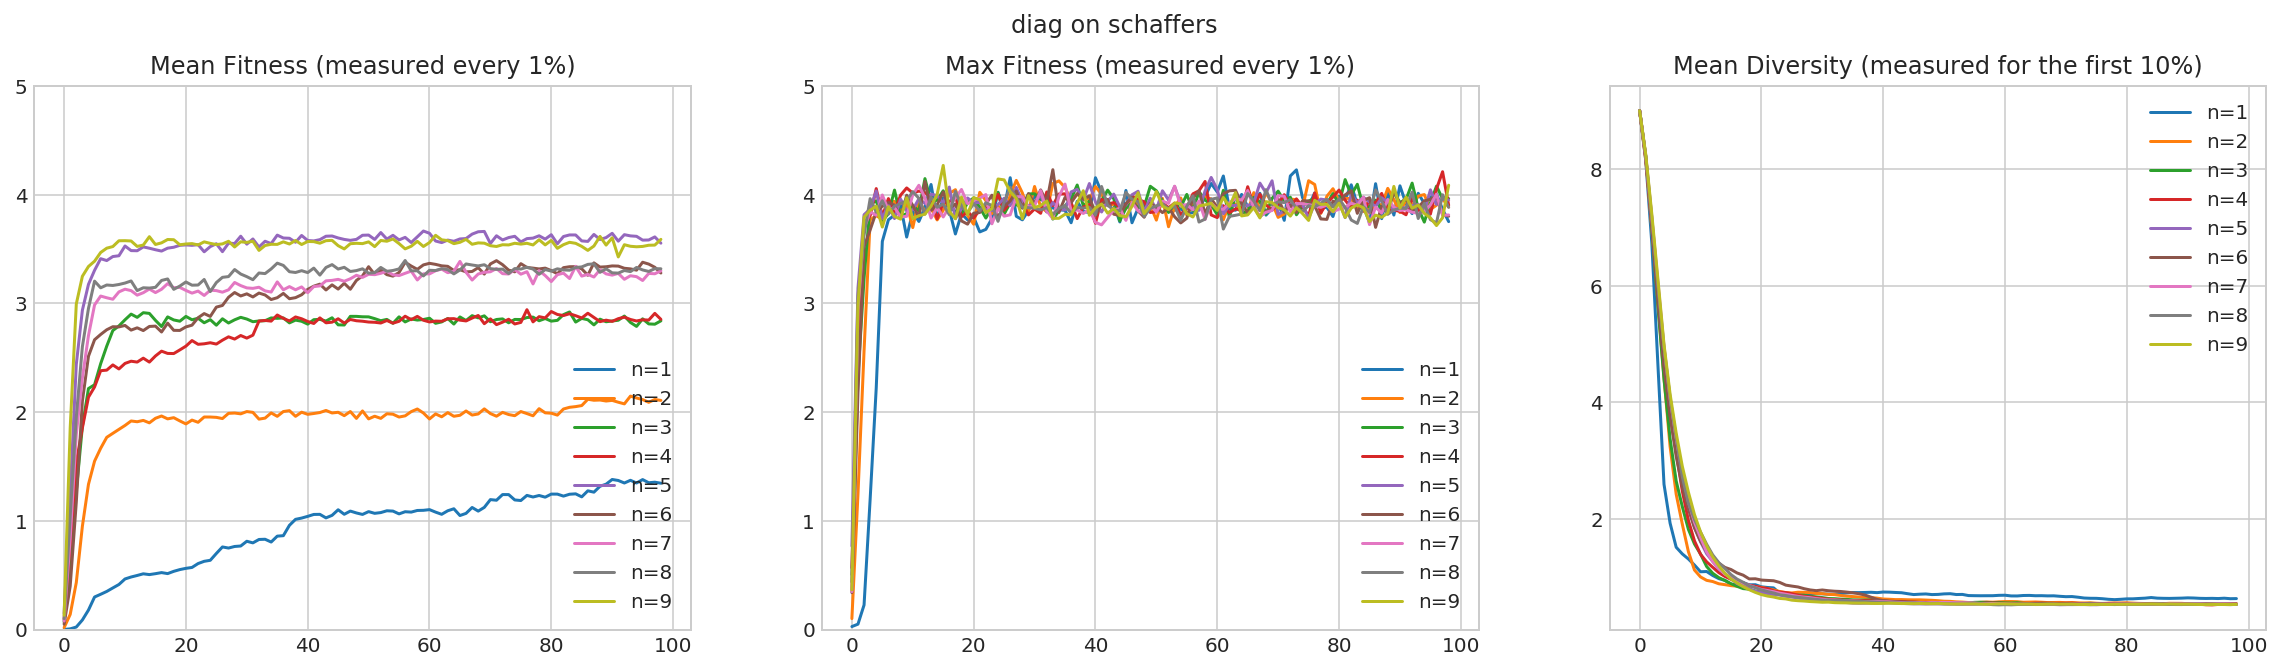

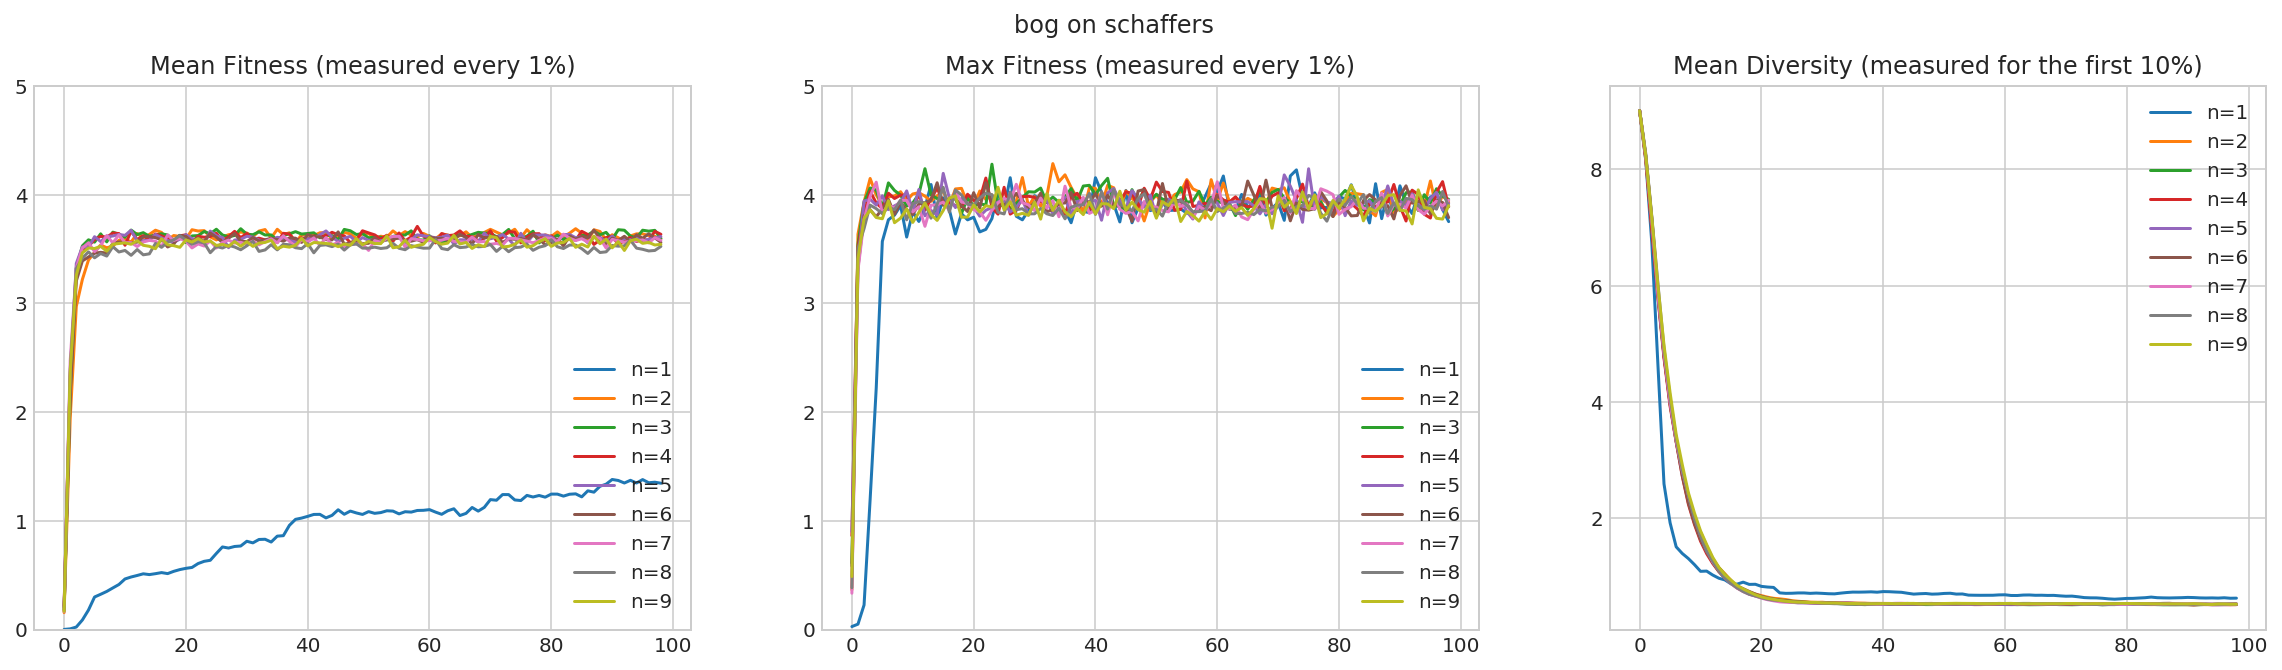

In [133]:
make_plots("schaffers", "nr2c", [0, 0.05])
make_plots("schaffers", "diag", [0, 5])
make_plots("schaffers", "bog", [0, 5])

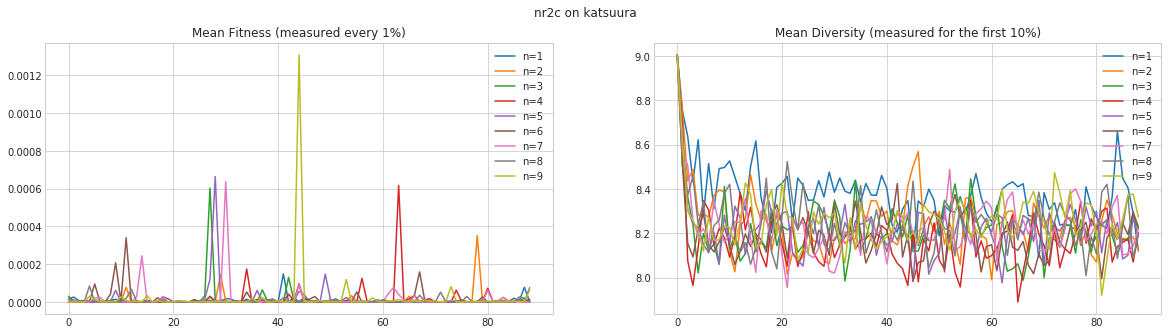

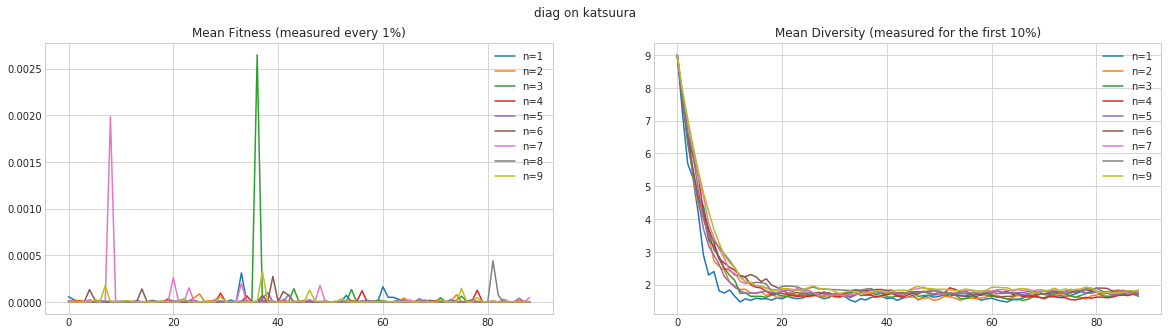

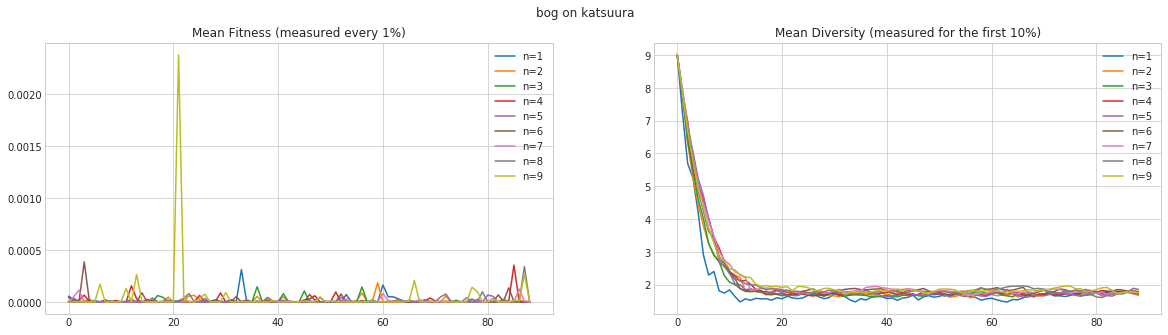

In [103]:
make_plots("katsuura", "nr2c", [0, 0.05])
make_plots("katsuura", "diag", [0, 4])
make_plots("katsuura", "bog", [0, 4])

In [112]:
dataframe = pd.read_csv("results/parsed/fitness_schaffers_diag_2.csv")
dataframe.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,0,0.003209,0.011342,0.066519,0.591523,1.764365,2.853112,3.791087,3.549811,3.486452,...,3.532000,3.735819,3.987616,4.001395,3.503952,3.719285,3.751964,3.636413,3.560088,8.545974
1,1,0.000428,0.002938,0.010528,0.031475,0.056237,0.081681,0.075640,0.091647,0.145306,...,0.250651,0.318723,0.279612,0.251723,0.220886,0.263746,0.223003,0.207288,0.280427,1.543569
2,2,0.002436,0.034826,0.181894,0.487300,0.715618,0.777044,0.834339,0.778066,0.687655,...,0.715134,0.656290,0.619004,0.722744,0.755055,0.711563,0.650902,0.821984,0.781942,3.740597
3,3,0.000186,0.001119,0.008346,0.021688,0.057743,0.085964,0.139488,0.166265,0.201291,...,0.180855,0.183394,0.205930,0.168255,0.204338,0.182731,0.165300,0.226576,0.143123,1.733235
4,4,0.028191,0.139756,0.362726,0.763834,1.076439,1.182951,3.181426,3.590935,3.533310,...,3.791381,3.777446,3.394431,3.829372,3.746544,3.598554,3.787074,3.425933,3.595235,8.581609


In [ ]:
import pandas as pd
import numpy as np

functions = ["schaffers"]
implementations = ["nr2c", "diag", "bog"]
n_parents = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

fitness_values = {}
fitness_max = {}
fitness_stds = {}
total_fitness = {}

diversity_values = {}
diversity_stds = {}

for func in functions:
    for imp in implementations:
        for n_p in n_parents:
            mean_fitness_values = []
            std_fitness_values = []
            max_fitness_values = []
            max_fitness = []
            dataframe = pd.read_csv("results/parsed/fitness_"+func+"_"+imp+"_"+n_p+".csv")
            if func == "schaffers":
                
                max_fitness.append(dataframe[dataframe.columns[101]])
                for i in range(1, 100):
                    mean_fitness_values.append(dataframe[dataframe.columns[i]].mean())
                    max_fitness_values.append(dataframe[dataframe.columns[i]].max())
                    std_fitness_values.append(dataframe[dataframe.columns[i]].std())
            else:
                max_fitness.append(dataframe[dataframe.columns[91]])
                for i in range(1, 90):
                    mean_fitness_values.append(dataframe[dataframe.columns[i]].mean())
                    max_fitness_values.append(dataframe[dataframe.columns[i]].max())
                    std_fitness_values.append(dataframe[dataframe.columns[i]].std())
            fitness_values[func+"_"+imp+"_"+n_p] = mean_fitness_values
            fitness_max[func+"_"+imp+"_"+n_p] = max_fitness_values
            fitness_stds[func+"_"+imp+"_"+n_p] = std_fitness_values
            total_fitness[func+"_"+imp+"_"+n_p] = max_fitness
            
            mean_diversity_values = []
            std_diversity_values = []
            dataframe = pd.read_csv("results_short/parsed/diversity_"+func+"_"+imp+"_"+n_p+".csv")
            if func == "schaffers":
                for i in range(1, 100):
                    mean_diversity_values.append(dataframe[dataframe.columns[i]].mean())
                    std_diversity_values.append(dataframe[dataframe.columns[i]].std())
            else:
                for i in range(1, 90):
                    mean_diversity_values.append(dataframe[dataframe.columns[i]].mean())
                    std_diversity_values.append(dataframe[dataframe.columns[i]].std())
            diversity_values[func+"_"+imp+"_"+n_p] = mean_diversity_values
            diversity_stds[func+"_"+imp+"_"+n_p] = std_diversity_values